WE are interested in the edge ages for preferential attachment. Edge age = (age of source node) - (age of target node)

In [86]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
N = int(1e4)
M = 1

# generate PA graph
g = ig.Graph.Barabasi(n=N,
                      m=M,
                      directed=True)

# compute citation ages
citation_ages = []
source_ages = []
for e in g.es:
    source = e.source
    target = e.target

    citation_ages.append(source - target)
    
    source_ages.append(source)

# citation age histogram

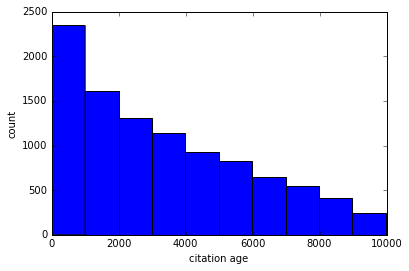

In [93]:
plt.hist(citation_ages);
plt.xlabel('citation age')
plt.ylabel('count')

(0, 9979)

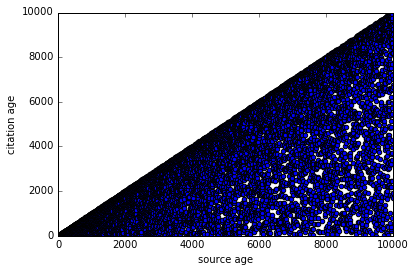

In [95]:
plt.scatter(source_ages, citation_ages)
plt.xlabel('source age')
plt.ylabel('citation age')
plt.xlim([0, N])
plt.ylim([0, max(citation_ages)])

# time vs. indegree

(0, 200)

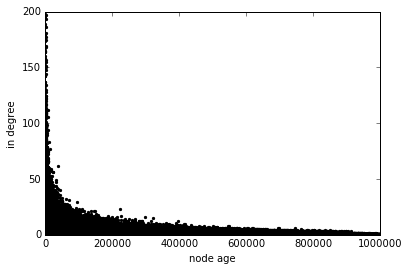

In [90]:
indegrees = g.indegree()
plt.scatter(range(N), indegrees,
            marker='.',
            color='black')
plt.xlabel('node age')
plt.ylabel('in degree')

plt.xlim([0, N])
plt.ylim([0, 200])

# Degree distribution

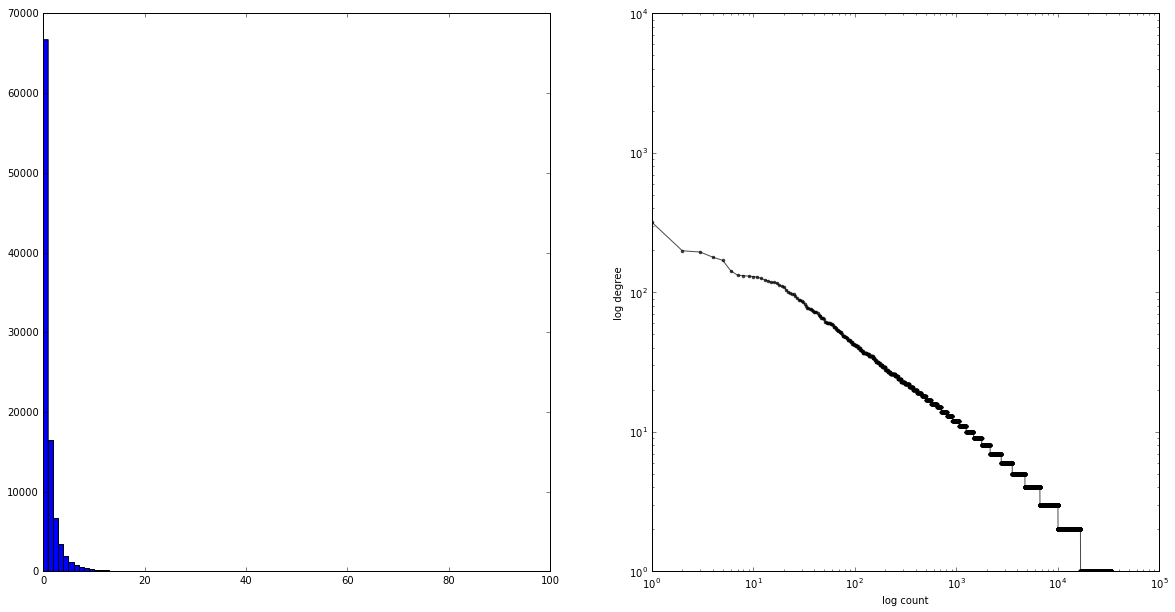

In [84]:
plt.figure(figsize = [20, 10])

plt.subplot(1,2,1)
dmax = 100
binwidth = 1
plt.hist(indegrees, bins=range(0, dmax + binwidth, binwidth));
plt.xlim([0, dmax])
# plt.ylim([0, 2e5])


plt.subplot(1,2,2)
plt.loglog(sorted(indegrees, reverse=True), '-', marker='.', color='black',
           alpha=.7);
plt.ylabel('log degree')
plt.xlabel('log count')

# Network plot

In [70]:
layout = []
indegs = g.indegree()
for n in range(N):
    x = n
    y = - .5 * indegs[n]
    # y = np.random.uniform()
    
    layout.append([x, y])

# vertices
visual_style = {}
visual_style['layout'] = layout
# visual_style['vertex_label'] = range(N)
# visual_style['vertex_label_size'] = 10
visual_style['vertex_size'] = 10
visual_style['vertex_color'] = 'black'
visual_style['vertex_frame_color'] = 'black'

visual_style["edge_width"] = .5
visual_style["edge_arrow_size"] = .5



visual_style["bbox"] = (300, 300)
visual_style["margin"] = 20

ig.plot(g, **visual_style)

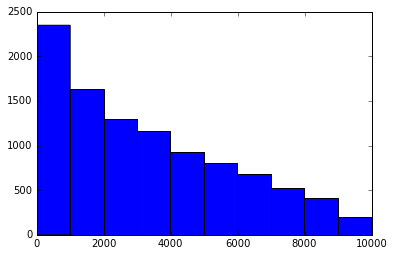